Found 406 images belonging to 3 classes.
Found 103 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5222 - loss: 1.2348 - val_accuracy: 0.6408 - val_loss: 0.8387
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7378 - loss: 0.5883 - val_accuracy: 0.6505 - val_loss: 0.7979
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8543 - loss: 0.3796 - val_accuracy: 0.7379 - val_loss: 0.6009
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8872 - loss: 0.3087 - val_accuracy: 0.7379 - val_loss: 0.7056
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9103 - loss: 0.2555 - val_accuracy: 0.7184 - val_loss: 0.7132
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9379 - loss: 0.1729 - val_accuracy: 0.7961 - val_loss: 0.5364
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9626 - loss: 0.1251 - val_accuracy: 0.7864 - val_loss: 0.5724
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9857 - loss: 0.1084 - val_accuracy: 0.7573 - val_loss:

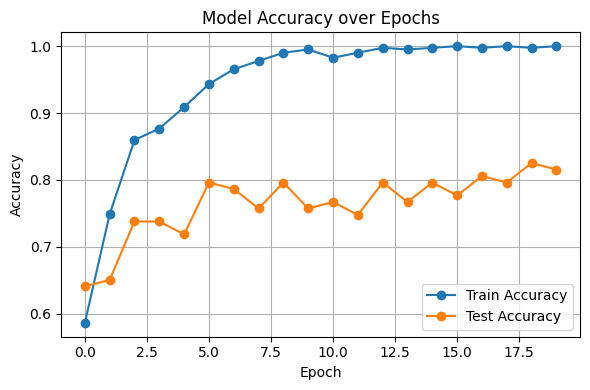

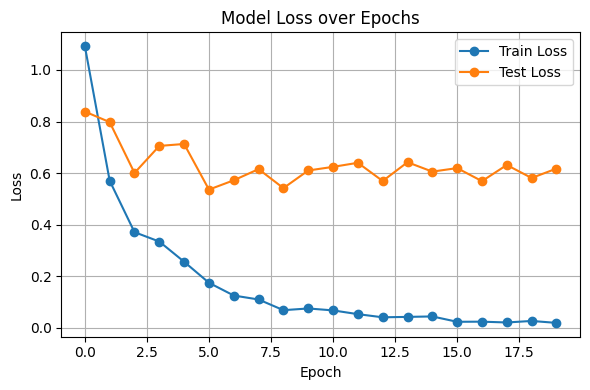

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ---- Reproducibility ----
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# ---- Directories and Hyperparameters ----
train_dir = 'D:/Lung_cancer/train'
test_dir = 'D:/Lung_cancer/test' 
target_size = (224, 224)
num_classes = 3
batch_size = 16
learning_rate = 0.0005
dropout_rate = 0.3
epochs = 20

# ---- Data Generators ----
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ---- Model Definition ----
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(dropout_rate)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Model Training ----
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

# ---- Evaluate Model ----
print("\nEvaluating on Test Data")
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

print("\nEvaluating on Training Data...")
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# ---- Save Training History ----
history_file = 'RN50hp_new_2.pkl'
with open(history_file, 'wb') as f:
    pickle.dump(history.history, f)
print("\nTraining history saved to", history_file)

# ---- Plot Accuracy and Loss ----
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Test Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
val_dir = 'D:/Lung_cancer/LC25000_sampled'
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
print("\nEvaluating on Validation Data...")
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

Found 1500 images belonging to 3 classes.

Evaluating on Validation Data...


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 83s 886ms/step - accuracy: 0.7085 - loss: 1.1925
Validation Accuracy: 80.93%
Validation Loss: 0.7551


In [11]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Predicting on validation data
val_predictions = model.predict(val_generator)
val_pred_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

# Predicting on test data
test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes
print("🔍 Validation Data Metrics:")
print(classification_report(val_true_labels, val_pred_labels, target_names=val_generator.class_indices.keys()))

print("🔍 Test Data Metrics:")
print(classification_report(test_true_labels, test_pred_labels, target_names=test_generator.class_indices.keys()))

# Additional individual metrics for better control
print("Validation Accuracy:", accuracy_score(val_true_labels, val_pred_labels))
print("Validation Precision:", precision_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation Recall:", recall_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation F1-Score:", f1_score(val_true_labels, val_pred_labels, average='weighted'))

print("Test Accuracy:", accuracy_score(test_true_labels, test_pred_labels))
print("Test Precision:", precision_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test Recall:", recall_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test F1-Score:", f1_score(test_true_labels, test_pred_labels, average='weighted'))

94/94 ━━━━━━━━━━━━━━━━━━━━ 73s 769ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 792ms/step
🔍 Validation Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.75      0.64      0.69       500
               Nor       0.98      0.89      0.94       500
Squamous_carcinoma       0.72      0.90      0.80       500

          accuracy                           0.81      1500
         macro avg       0.82      0.81      0.81      1500
      weighted avg       0.82      0.81      0.81      1500

🔍 Test Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.85      0.87      0.86        39
               Nor       0.74      0.84      0.79        31
Squamous_carcinoma       0.86      0.73      0.79        33

          accuracy                           0.82       103
         macro avg       0.82      0.81      0.81       103
      weighted avg       0.82      0.82      0.82       103

Validation Accuracy: 0.80

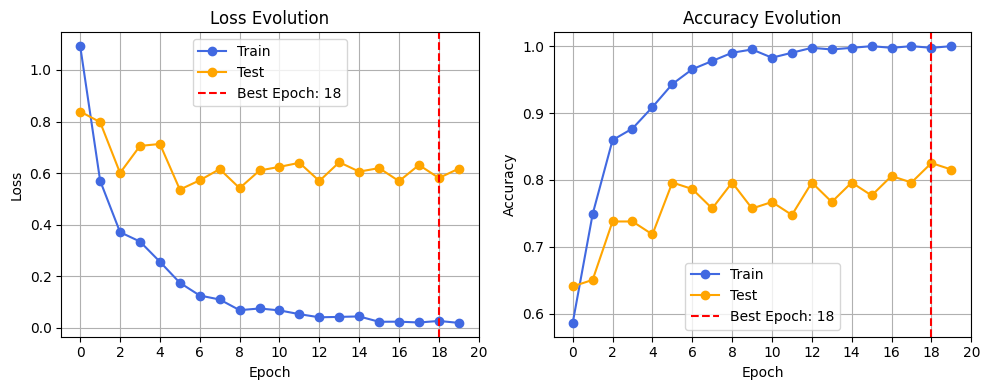

In [13]:
import pickle
import matplotlib.pyplot as plt

# 🔹 Load only ResNet50 history
history_path = r'C:\Users\Milanjyoti\Desktop\lp\rn50hp_new_2.pkl'
with open(history_path, 'rb') as f:
    resnet50_history = pickle.load(f)

# 🔹 Function to plot Loss and Accuracy with subplots
def plot_resnet50(history, best_epoch=None, max_epochs=20):
    plt.figure(figsize=(10, 4))

    x_values = list(range(max_epochs)) 
    x_ticks = list(range(0, max_epochs + 1, 2))  

    # 1️⃣ Loss Evolution subplot
    plt.subplot(1, 2, 1)
    train_loss = history['loss'][:max_epochs]
    val_loss = history['val_loss'][:max_epochs]

    plt.plot(x_values, train_loss, label='Train', color='royalblue', marker='o')
    plt.plot(x_values, val_loss, label='Test', color='orange', marker='o')

    if best_epoch is not None:
        plt.axvline(x=best_epoch, linestyle='--', color='red', label=f'Best Epoch: {best_epoch}')

    plt.title('Loss Evolution')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xticks(x_ticks)

    # 2️⃣ Accuracy Evolution subplot
    plt.subplot(1, 2, 2)
    train_acc = history['accuracy'][:max_epochs]
    val_acc = history['val_accuracy'][:max_epochs]

    plt.plot(x_values, train_acc, label='Train', color='royalblue', marker='o')
    plt.plot(x_values, val_acc, label='Test', color='orange', marker='o')

    if best_epoch is not None:
        plt.axvline(x=best_epoch, linestyle='--', color='red', label=f'Best Epoch: {best_epoch}')

    plt.title('Accuracy Evolution')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.xticks(x_ticks)

    plt.tight_layout()
    plt.show()

# 🔹 Set the best epoch (optional)
best_epoch = 18

# 🔹 Plot graph
plot_resnet50(resnet50_history, best_epoch=best_epoch, max_epochs=20)
